name: Saumya Shah 

group members:

* Tanishq Tanmay
* Parth Maheshwari
* KSD Teja
* Kuldeep Singh


____
# ICAs for Wed and Fri

This week we are combining the notebooks for Wed's and Fri's ICA to cut down on the number of notebooks Vicente needs to manage. 

Of course, if you complete Wed's ICA, feel free to move to Fri's and get started. 

____
## Wed ICA
____

This week's ICAs ask you to do most of the work - like a real data scientist would do! 

The main goal for Wed is to get the data, perform some simple EDA and design the layout for a web app. This is the process you will be thinking about for your first project. 

To make it so that you can discuss with your classmates, however, we will all use the same dataset. 

Suppose you decide to do a project in the medical arena, and you learn of the Wisconsin Breast Cancer Diagnostic dataset. 

👉🏻 (5) Your first task: find this WI cancer dataset and download it. There are many places on the internet where you can find it, and it might be in slightly different formats depending on where you get it. 

👉🏻 (5) Read the dataset into a dataframe, using something like [.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Note that you may need to use more than one file to get the column names. This is the messy part of data science. You might spend some time finding a clean CSV that already has the column names (hint: kaggle), or you need to add the information yourself. 

👉🏻 (8) One you have read the data in and built a dataframe with good column names, perform some basic IDA and EDA. Are there NaNs? What are in the columns and what looks useful? You might use some of the basic plotting capabilities in Pandas, or even try using `Seaborn`.

👉🏻 (15) Design 3-5 "interesting" `Seaborn` plots. Talk through this with your group. Use the whiteboards. Here, "interesting" means that there is an interesting **story/narrative** to be told. Think through what good choices would be: are there interesting distributions? are there interesting categories, and distributions within categories? Feel free to make as many practice plots as you need, which you use on Fri. Design these plots into a web app. (You don't need to make the web app, just think through the design.) If you have time, research how to use `Seaborn` plots in `streamlit`. In a markdown cell, describe your design. 

Use one Seaborn plot from each type ([distribution](https://seaborn.pydata.org/tutorial/distributions.html), [categorical](https://seaborn.pydata.org/tutorial/categorical.html) and [relational](https://seaborn.pydata.org/tutorial/relational.html)). If it makes sense, use the regression options.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df = pd.read_csv('datasets/wisconsin cancer dataset.csv')
df= df.iloc[:,:-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
def reorder_columns(dataframe, col_name, position):
    """Reorder a dataframe's column.
    Args:
        dataframe (pd.DataFrame): dataframe to use
        col_name (string): column name to move
        position (0-indexed position): where to relocate column to
    Returns:
        pd.DataFrame: re-assigned dataframe
    """
    temp_col = dataframe[col_name]
    dataframe = dataframe.drop(columns=[col_name])
    dataframe.insert(loc=position, column=col_name, value=temp_col)
    return dataframe
df = reorder_columns(dataframe=df, col_name='diagnosis', position=len(df.columns)-1)
df.set_index('id', inplace=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se      

In [14]:
cols = df.columns[:-1]
cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

ValueError: num must be 1 <= num <= 58, not 59

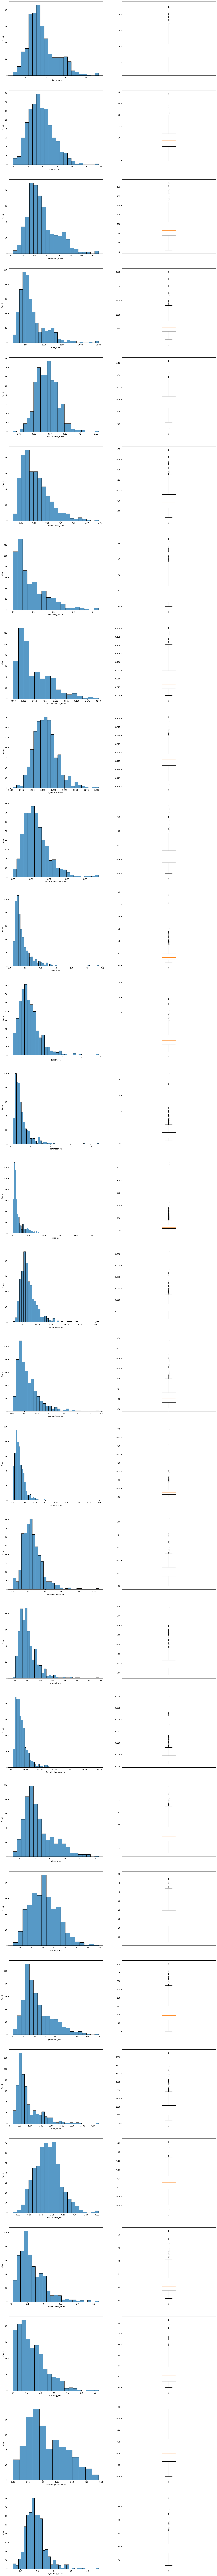

In [28]:
plt.figure(figsize = (20, 250))
i = 1
for col in cols:
    plt.subplot(29, 2, i)
    sns.histplot(df[col])
    
    plt.subplot(29, 2, i+1)
    plt.boxplot(df[col])
    
    i+=2

In [23]:
for col in cols:
    print(max(df[col]))

28.11
39.28
188.5
2501.0
0.1634
0.3454
0.4268
0.2012
0.304
0.09744
2.873
4.885
21.98
542.2
0.03113
0.1354
0.396
0.05279
0.07895
0.02984
36.04
49.54
251.2
4254.0
0.2226
1.058
1.252
0.291
0.6638
0.2075


____
## Fri ICA
____

👉🏻 Given the web app design from Wed, build a web app using `streamlit`. This web app will be different from your previous web apps in three ways:
1. you use the WI Cancer dataset, which needs to be read in from a file (not coming in through a library),
2. your plots are all Seaborn (not Altair or Plotly),
3. you will ask your user to [input something](https://docs.streamlit.io/library/api-reference/widgets) that impacts at least one of the plots. 


A simple idea for step 3 is to ask the user to input what column to plot, using [this widget](https://docs.streamlit.io/library/api-reference/widgets/st.selectbox). Or, you can use two widgets to ask for what to put on $y$ and $x$. It's up to you: when you do your project, you will have to make these decisions on your own, as each student will have a unique design.

Before you leave, demonstrate your web app, using `streamlit run your_file.py` to one of the instructors. Include  `your_file.py` file in D2L, as well as this notebook. 
